In [1]:
import os
from PIL import Image
import cv2

import torch
import numpy as np
import torch.functional as F
from torch.autograd import Variable as V
from torchvision import transforms
from torch.utils.data import DataLoader

from datareader import DataStream, load_test_data
from model import AlbuNet
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tnames = load_test_data()

In [3]:
# tnames

In [4]:
# Image.open(tnames[0])

In [5]:
model = torch.load('./resnet_1024_aug.pt')
model = model.cuda()

In [33]:
tfms = transforms.Compose([
                           ToTensorTarget(),
                           NormalizeTarget(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])])

In [35]:
ds = DataStream(tnames, tnames, sz=1024, transform=tfms)
dm = DataLoader(ds, batch_size=1, num_workers=23)

In [15]:
s = next(iter(ds))

In [9]:
model.eval()

AlbuNet(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [10]:
len(ds)

927

In [16]:
preds = np.zeros((len(ds), 900, 900))

In [20]:
sample['sat'].size()

torch.Size([1, 3, 1024, 1024])

In [23]:
y_pred.shape

(1024, 1024)

In [36]:
for idx, sample in enumerate(dm):
    X = V(sample['sat'].cuda(), volatile=True)
    y_pred = model(X).cpu()
    y_pred = np.squeeze(y_pred.data.numpy())
    # y_pred = np.moveaxis(y_pred, 0, -1)
    preds[idx] = cv2.resize(y_pred, (900, 900))
    

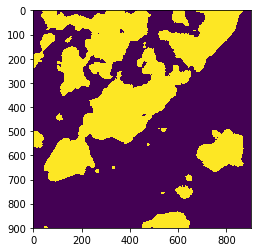

In [37]:
plt.imshow(preds[-19]>0.5)

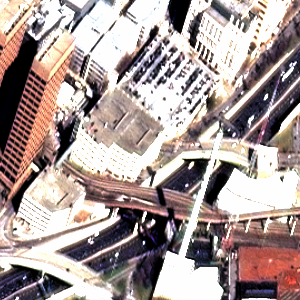

In [31]:
Image.open(tnames[-19]).resize((300,300))

In [41]:
ts = np.array(tnames)

In [42]:
ts[0]

PosixPath('/home/antares/ssd_data/topcoder/spacenet/rgbs/test_rgb/Pan-Sharpen_Atlanta_nadir10_catid_1030010003993E00_733151_3735939.png')

In [44]:
t_ = np.load('../topcoder/cosmiq_sn4_baseline/names.npy')

In [45]:
t_[0]

PosixPath('/home/antares/ssd_data/topcoder/spacenet/rgbs/test_rgb/Pan-Sharpen_Atlanta_nadir10_catid_1030010003993E00_733151_3735939.png')

In [46]:
ts[123] == t_[123]

True

In [38]:
np.save('../topcoder/cosmiq_sn4_baseline/preds4.npy', preds)

In [48]:
str(t_[123])[55:-4]

'Pan-Sharpen_Atlanta_nadir13_catid_1030010002B7D800_748901_3719739'

In [11]:
import skimage.io as io
import numpy as np

In [13]:
t = io.imread(tnames[9])

In [29]:
t_ = np.pad(t, ((62,62),(62,62),(0,0)), mode='constant')
t_.shape

(1024, 1024, 3)

In [41]:
import cv2
import skimage.io as io

In [61]:
def sharping(im):
    gK = cv2.getGaussianKernel(21, 5)
    low_pass = cv2.filter2D(im, -1, gK)
    res = im - low_pass
    ret = im + res
    return ret

In [63]:
im = sharping(io.imread(tnames[123]))

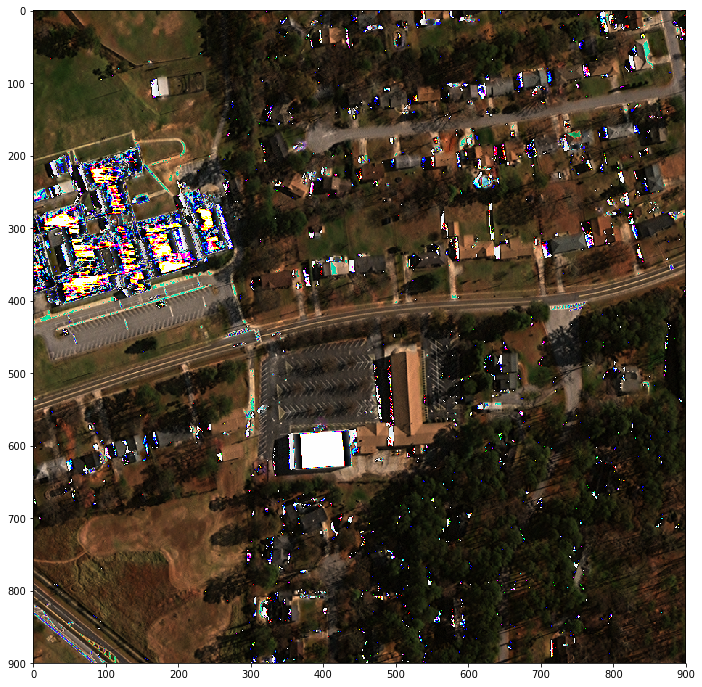

In [65]:
plt.figure(figsize=(12,12))
plt.imshow(np.rot90(im))

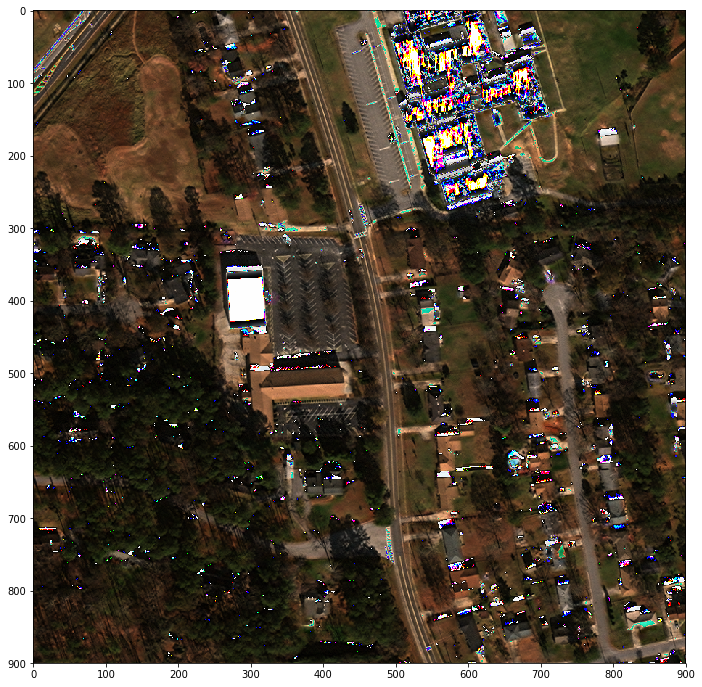

In [62]:
plt.figure(figsize=(12,12))
plt.imshow(sharping(io.imread(tnames[123])))

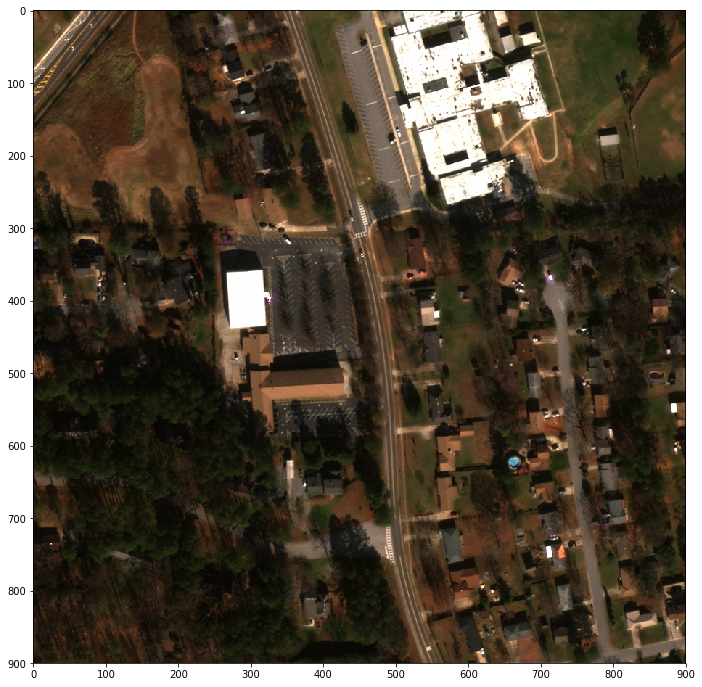

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(io.imread(tnames[123]))